In [1]:
#Import packages
import pandas as pd
import numpy as np                              
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn.objects as so

In [3]:
#Load Data 
games = pd.read_csv('games_data_clean.csv')
usernames = pd.read_csv('usernames.csv')

In [4]:
#Set Categories and orders
games['Result'] = pd.Categorical(values = games['Result'] , categories=['Black Win' , 'Draw' , 'White Win'] , ordered = True)
games['Title (White)'] = pd.Categorical(values = games['Title (White)'] , categories=['NM','FM','IM','GM'] , ordered = True)
games['Title (Black)'] = pd.Categorical(values = games['Title (Black)'] , categories=['NM','FM','IM','GM'] , ordered = True)
games['Game Type'] = pd.Categorical( values = games['Game Type'] , categories = ['Bullet' , 'Blitz' , 'Rapid'], ordered = True)
games['Tournament Game'] = pd.Categorical( values = games['Tournament Game'])

# Introduction to Exploratory Data Analysis on Chess Game

Chess, often regarded as the "Game of Kings," is a centuries-old strategy board game that has captivated minds with its complexity and elegance. Throughout history, chess has seen countless battles waged over the 64 squares of its board. These battles are not only contests of intelligence and strategy but also a reflection of human ingenuity.

In the world of chess, understanding the patterns and characteristics of game outcomes is of paramount importance. Exploratory Data Analysis (EDA) of chess games is a fascinating journey into uncovering the factors that contribute to success in this timeless game.

The dataset under scrutiny in this EDA consists of a collection of chess game records from the best players in the world,and how they match under varying Game Conditions and against differing opponents. This exploration aims to shed light on several compelling questions:

1. **Which side tends to win more frequently: white or black?** In chess, the player controlling the white pieces traditionally moves first, potentially bestowing a strategic advantage. EDA will help us discern if this tradition carries statistical significance.

2. **How does player skill level affect game outcomes?** Chess is known for its rating systems, such as the Elo rating, which quantifies a player's ability. EDA can provide insights into whether higher-rated players consistently secure victory.

3. **How does player accuracy affect game outcomes?** Chess is a game of precision, and player accuracy in executing moves is critical. The players accuracy is a single game estimate, calculated by highly complex chess engines, estimating the quality of moves from each player thoruhg the game. Naturally, we would expect the player with higher accuracy to win, but is this always the case? Can higher rated players win with lower accuracy? Do games with very similar accuracy scores almost surely result in a draw?


4. **What can we learn from the time format of the games?** Chess games can be classified into various time formats, from 10 second 'bullet' games, where moves are made almost instantly, to 90 minute games where players are allowed to be considered and calculated. EDA will help us understand how time formats impact move counts and result probabilities.


By examining this dataset, we aim to gain valuable insights into this intellectual battleground and, in doing so, enhance our understanding of the game itself at the highest level.

## Dataset Description

The dataset under examination contains data of games exclusively between Titled Chess Players. That is, players who have been granted an official title from the FIDE International Chess Federation.

All data was gathered using web scraping from Chess.com. 102 Player usernames were gathered from the leaderboards of the 3 most prominent game modes ( Bullet, Blitz and Rapid ). This equates to the top 50 players in each category. 

Games data was then gathered from games archive of these players. Each row in the dataset represents a single chess game, and the columns provide valuable information about the game, the players, and the outcomes. An overview of dataset columns is included below for reference:

1. **Username (White) / Username (Black)**: The username or identifier of the player controlling the white and black pieces in the game

2. **Rating (White)** / **Rating (Black)**:: The ELO rating of the players at the beginning of the game, providing an indication of their skill level.


3. **Title (White)** / **Title (Black)**: The title held by the players. This includes National Master ('NM'), FIDE Master ('FM'), International Master ('IM') and Grand Master ('GM').

    Note that other titles, such as Candidate Master ('CM') and Womens Grand Master ('WGM') exist but have been aggregated with the afformentioned based on minimum requirements set by FIDE for the purposes of this analysis.


4. **Result**: The result of the chess game, indicating whether it was a win for White, a win for Black, or a draw


5. **Moves Count**: The total number of moves played in the game.

6. **Date**: The date on which the game was played.

7. **Tournament Game**: A categorical identifier denoting whether the game was part of a tournament or not.

8. **Rating Difference**: The difference in rating between the white and black players, which can offer insights into rating disparities.

9. **Accuracy (White) / Accuracy (Black)**: The accuracy of the player's moves, measured as a percentage.

10. **Accuracy Difference**: The difference in accuracy between the two players, providing insights into the precision of play.

11. **Time**: The time allowed to each player at the beginning of the game.

12. **Interval**: The time interval, if applicable, in which the game was played. The interval amount is added to the players time after every move they play.

13. **Total Time**: The total time allocated to playings for the game, including time allocated at games beginning and interval additions.

14. **Game Type**: Category of games time control. This dataset includes bullet, blitz and rapid game types.

    - Games under 3 mins are 'Bullet' games
    - Games 3 mins or more and less than 10 mins are 'Blitz' games
    - Games longer than 10 mins are 'Rapid' games


This dataset contains 15705 individual Games

In [5]:
games.tail()

,Username (White),Rating (White),Title (White),Username (Black),Rating (Black),Title (Black),Result,Moves Count,Date,Tournament Game,Rating Difference,Accuracy (White),Accuracy (Black),Accuracy Difference,Time,Interval,Total Time,Game Type
15701,r31415,2692,NM,Cryptochess,2663,IM,Draw,43,"Jul 6, 2023",N,29,NaN,NaN,NaN,3.0,0.0,3.0,Blitz
15702,Cryptochess,2662,IM,r31415,2693,NM,Black Win,49,"Jul 6, 2023",N,-31,NaN,NaN,NaN,3.0,0.0,3.0,Blitz
15703,r31415,2683,NM,Cryptochess,2670,IM,Black Win,46,"Jul 6, 2023",N,13,NaN,NaN,NaN,3.0,0.0,3.0,Blitz
15704,Cryptochess,2661,IM,r31415,2694,NM,Black Win,38,"Jul 6, 2023",N,-33,NaN,NaN,NaN,3.0,0.0,3.0,Blitz
15705,r31415,2684,NM,Cryptochess,2669,IM,White Win,55,"Jul 6, 2023",N,15,NaN,NaN,NaN,3.0,0.0,3.0,Blitz


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15706 entries, 0 to 15705
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Username (White)     15706 non-null  object  
 1   Rating (White)       15706 non-null  int64   
 2   Title (White)        15706 non-null  category
 3   Username (Black)     15706 non-null  object  
 4   Rating (Black)       15706 non-null  int64   
 5   Title (Black)        15706 non-null  category
 6   Result               15706 non-null  category
 7   Moves Count          15706 non-null  int64   
 8   Date                 15706 non-null  object  
 9   Tournament Game      15706 non-null  category
 10  Rating Difference    15706 non-null  int64   
 11  Accuracy (White)     10006 non-null  float64 
 12  Accuracy (Black)     10006 non-null  float64 
 13  Accuracy Difference  10006 non-null  float64 
 14  Time                 15706 non-null  float64 
 15  Interval           

# Exploring Categorical Distributions and Class Imbalances
We initiate our analysis by delving into the distribution of categorical variables within the dataset. In Figure 1, we illustrate the distribution of results, player titles, game types, and tournament games, which unveils significant insights:

- White-side players exhibit a higher win rate, aligning with the advantage often associated with controlling white pieces. This trend persists even at the highest levels of play.

- Grandmasters dominate the dataset, reflecting our focus on top-tier players. However, this distribution may not mirror the broader chess player population.

- Blitz games are the most prevalent, suggesting their popularity among elite players and spectators, offering a blend of excitement and strategy.

- Surprisingly, tournament games constitute nearly half of the dataset, surpassing expectations. 

The data presents imbalances, especially in results, game types, and player titles. These imbalances can impact model building, making sampling methods such as undersampling, oversampling, or SMOTETomek vital for classification tasks. While disparities in player titles and game types may have limited effects, addressing imbalances in game results, particularly 'Draws,' becomes crucial. Lower accuracy in predicting draws compared to wins or losses may warrant the application of sampling methods for more robust predictions.

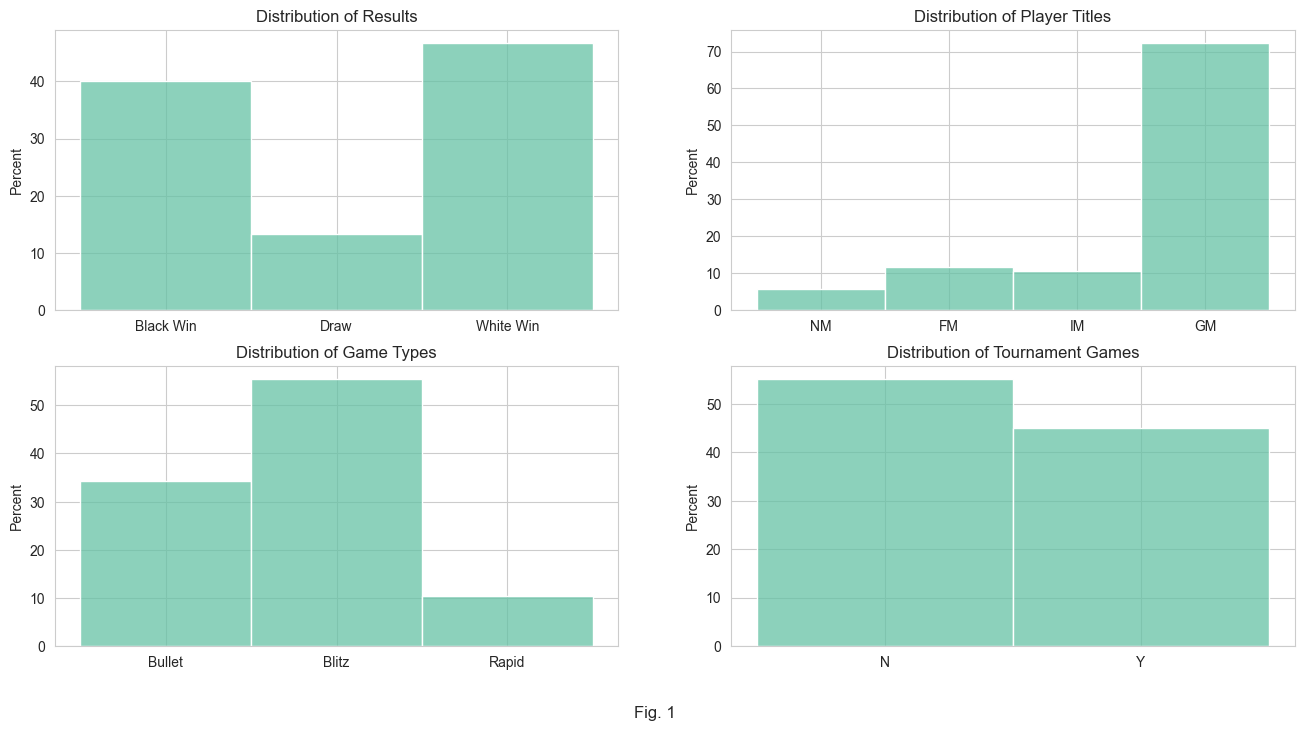

In [74]:
#Categorical Variables 
sns.set_style("whitegrid")
sns.set_palette('Set2')

#define dimensions of subplots (rows, columns)0
fig, axes = plt.subplots(2, 2 ,figsize = (16,8))
sns.histplot(x = 'Result' ,data  = games , stat = 'percent' , ax=axes[0,0])
sns.histplot(pd.concat([games['Title (White)'] , games['Title (Black)']]) , stat = 'percent' , ax = axes[0,1])
sns.histplot(x = 'Game Type' ,data  = games , stat = 'percent' , ax=axes[1,0])
sns.histplot(x = 'Tournament Game' ,data  = games , stat = 'percent' , ax=axes[1,1])

#Annotations and aesthetics
axes[0,0].set(title = "Distribution of Results" , xlabel = " ")
axes[0,1].set(title  = "Distribution of Player Titles", xlabel = " ")
axes[1,0].set(title  = "Distribution of Game Types", xlabel = " ")
axes[1,1].set(title  = "Distribution of Tournament Games", xlabel = " ")
fig.text(0.5, 0.02, "Fig. 1", ha="center", fontsize=12);

Upon closer examination of player titles, it becomes evident how data skew strongly favors Grandmaster (GM) titled players while presenting a notable scarcity of National Master (NM) titles. Remarkably, there are merely 23 recorded games out of a pool exceeding 15,000 that involve two NM titled players. Although we could employ sampling methods to augment this subset, doing so would likely introduce significant bias and errors, potentially sacrificing information (via undersampling) or distorting results (via oversampling) due to the stark size disparity between sampling groups.

Tus absence of data for NM vs. NM and NM vs. FIDE Master (FM) games raises concerns about the reliability of estimates in model building. Consequently, to ensure robust and accurate modeling, we opt to exclude the NM category from our dataset at eis sta of Model Buildingge.

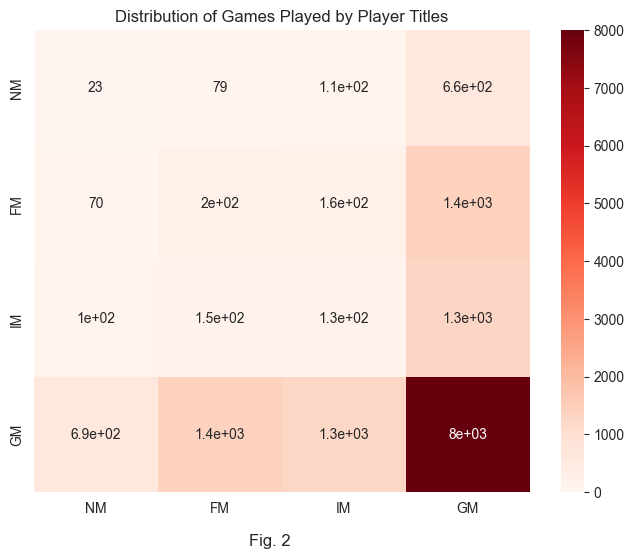

In [94]:
fig = plt.figure(figsize = (8,6))
sns.heatmap(games[['Title (White)' , 'Title (Black)']].value_counts(sort=False).values.reshape((4,4))  , cmap = 'Reds' , vmin = 0, annot=True , xticklabels= ['NM' , 'FM' , 'IM' , 'GM'] , yticklabels= ['NM' , 'FM' , 'IM' , 'GM'])
plt.title('Distribution of Games Played by Player Titles')
fig.text(0.42, 0.02, "Fig. 2", ha="center", fontsize=12);

# Correlation Analysis

Correlation Analysis stands as a pivotal point in our Exploratory Data Analysis. I will discuss premleminary thoughts and observations on the correlations and relationships between variables in this section and I will refer back to this section as we progress through the rest of this Exploratory Data Analysis.

Some strong correlations can be immediately dismissed. Rating Difference for example, is moderately correlated with Rating (White) and Rating (Black). Rating Difference is a linear combination of these two variables and, on this basis, we can ignore these values. The same can be said for the correlations between Accuracy Difference and Accuracy (White) and Accuracy (Black)

Similarly, Time, Interval and Total time are Strongly, Positively correlated. Total Time is a linear combination of Time, Interval and Moves Count and, yet again on this basis, the correlation can be dismissed.  Time and Interval are not linearly related. However, certain combinations of Time and Interval are popular among players and offered as default on chess.com. As such, the correlation here is a product of popular Time Controls and does not hold significance for our purposes.

Rating Difference and Accuracy Difference were moderately positively correlated with a value of $\rho = .44$. This indicates that the player with higher rating tends to achieve a higher accuracy score and the greater the difference between the players rating, the greater the difference in accuracy tends to be. 

Rating (White) and Rating (Black) are moderately negatively correlated with Time and Interval ($\rho = -.41 , -.32$) suggesting that low ratings are connected with longer time controls. Of course, longer games take more time to complete and players typically have less games completed for longer time controls, which limits the potential rating gain and results in lower ratings. Consulting leaderboards for 'Bullet', 'Blitz' and 'Rapid' Game Types on chess.com, we can see that, as we move to longer time controls, the highest ranking players do have lower ratings and less overall games played, indicating this may be the case.

Additionally, Accuracy (White) and Accuracy (Black) are weakly positively correlated with Time and Interval. Hence, longer time controls are indicative of higher accuracy scores. Longer Time Controls allow players more time to consider each move and this would allow for higher accuracy scores. This is inspite of ratings being typically lower for longer time controls. This further supports the reasoning that lower ratings are due to less total games being played for longer time controls as this disputes the idea that lower ratings could be due to lower skill levels at higher time controls.


<Axes: >

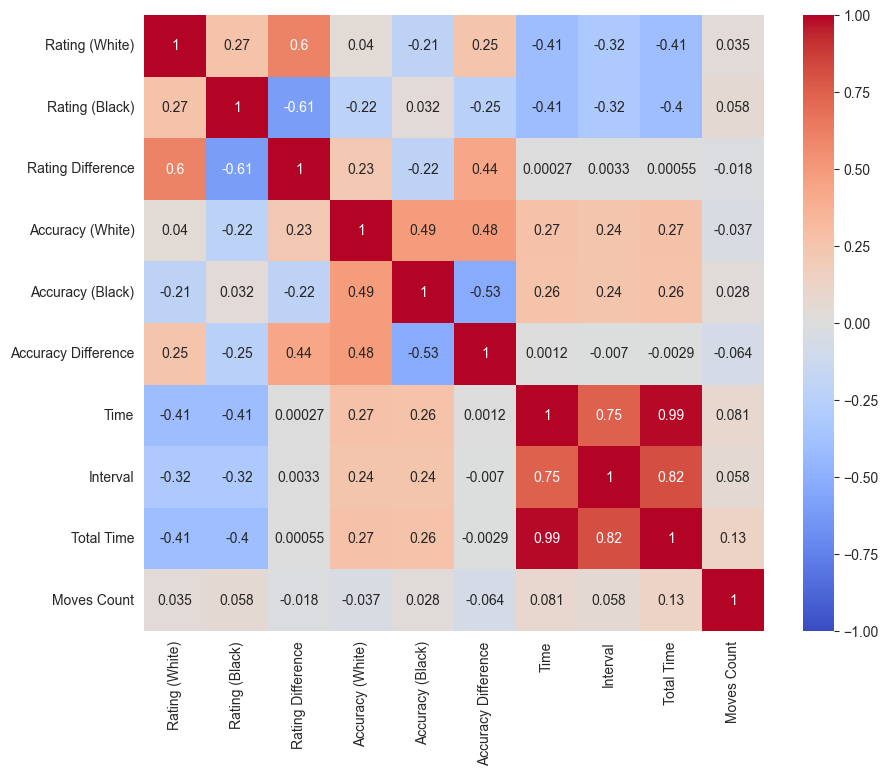

In [270]:
plt.figure( figsize=(10,8) )
sns.heatmap(games[['Rating (White)' , 'Rating (Black)' ,'Rating Difference' ,  'Accuracy (White)' , 'Accuracy (Black)' , 'Accuracy Difference','Time',
       'Interval', 'Total Time', 'Moves Count']].corr() , annot=True ,  cmap="coolwarm" , vmin=-1, vmax=1)

## Rating 

Player ratings exhibit a positive skew, and the distributions for white and black players show minimal disparity. In contrast, the distribution of rating differences displays a high degree of symmetry, aligning well with a normal distribution model.

Analyzing the distribution of rating differences in relation to game results sheds light on the influence of player ratings on outcomes. As anticipated, players with higher ratings tend to secure victories. This affect appears to strengthen the greater the differences between the players rating.

As the difference between ratings approaches 0, Draws become more prevalent as the rating difference converges to zero, while they remain rare at the extremeties. 

The advantage of having the white piece is again on display. The absolute value of mean and median values are approximately 10 rating points higher for 'Black Win' Result than those of the 'White Win' Result. The same can be said about the upper and lower quantiles ( ie. comparing 25% quantile of 'Black Win' with the 75% quantile of 'White Win').

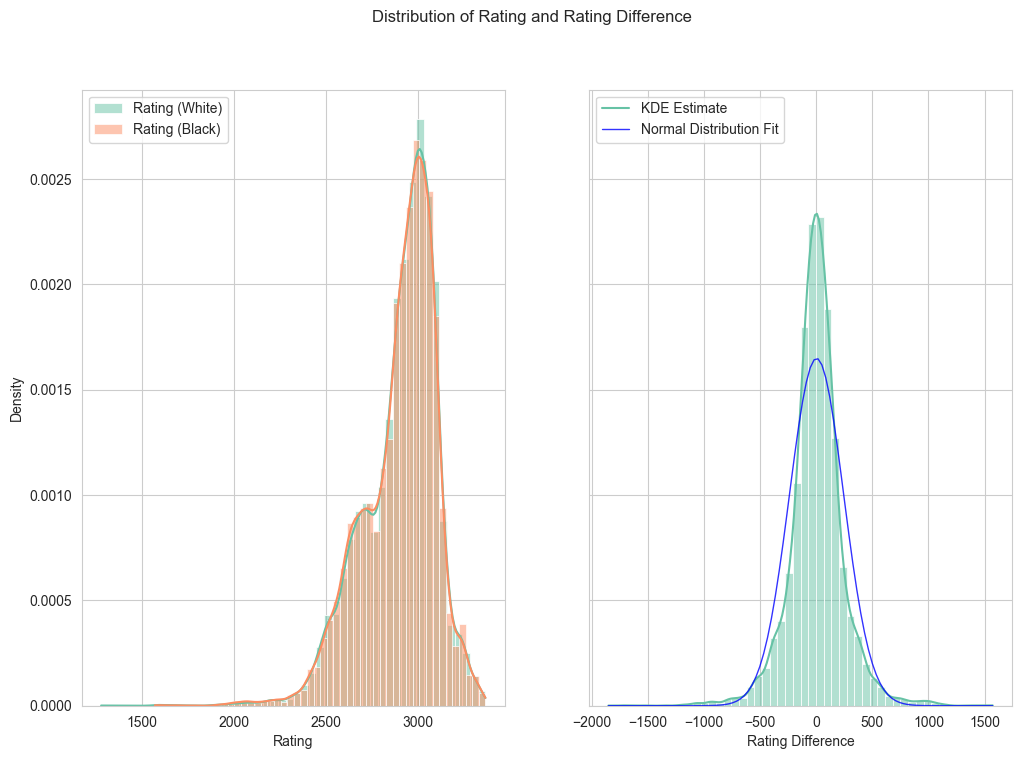

In [80]:
fig, axes = plt.subplots(1, 2 , figsize = (12,8) , sharey=True)
fig.suptitle('Distribution of Rating and Rating Difference')

#Histogram of Rating Variables: Rating Difference, Rating (White) & Rating (Black) 
sns.histplot(data  = games ,  x = 'Rating (White)' , kde=True , stat = 'density' , bins = 50 , ax = axes[0] , alpha = .5 , label = 'Rating (White)' ) #color = 'lightblue', )
sns.histplot(data  = games ,  x = 'Rating (Black)' , kde=True , stat = 'density' , bins = 50 , ax = axes[0] , alpha = .5 ,label = 'Rating (Black)') # , color = 'pink')
sns.histplot(data  = games ,  x = 'Rating Difference' , kde=True , stat = 'density' , ax = axes[1] , bins = 50)

#fit distribution and plot as lineplot 
mu, std = stats.norm.fit(games['Rating Difference'] , method = 'mle')
xmin = min(games['Rating Difference'])
xmax = max(games['Rating Difference'])
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

sns.lineplot(x = x, y = p, linewidth=1 ,alpha = .8,  ax = axes[1], color = 'blue')

#annotations and aesthetics
axes[0].set_xlabel("Rating")
axes[0].legend( loc="upper left" )
axes[1].legend(labels = ['KDE Estimate' , 'Normal Distribution Fit'] , loc="upper left" )
plt.show()

,count,mean,std,min,25%,50%,75%,max
Result,,,,,,,,
Black Win,6296.0,-132.822745,221.669826,-1852.0,-228.0,-99.0,2.25,640.0
Draw,2081.0,-4.925997,154.658747,-813.0,-90.0,-3.0,85.00,741.0
White Win,7329.0,121.643198,215.901445,-849.0,-10.0,89.0,209.00,1572.0


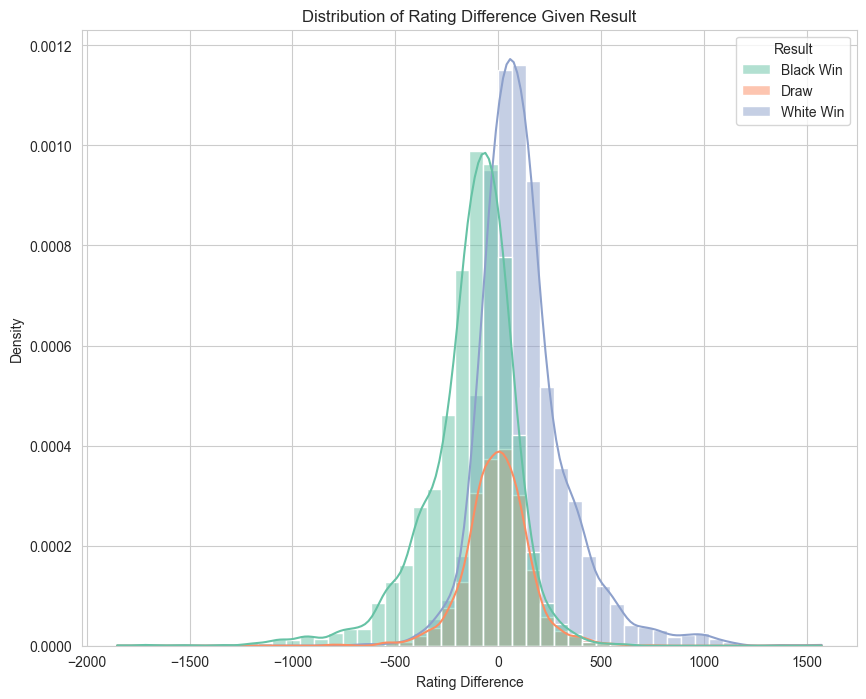

In [101]:
#Histogram of Rating difference
fig = plt.figure(figsize = (10,8))
sns.histplot(data  = games ,  x = 'Rating Difference' , kde=True , stat = 'density' , hue = 'Result',  multiple = 'layer' ,  bins = 50)
plt.title("Distribution of Rating Difference Given Result")

#Generate descriptive statistics grouped by Result
games.groupby(by = 'Result')['Rating Difference'].describe()

## The Importance of Accuracy

Accuracy estimates provide a measure of a player's precision and correctness in their moves during chess games. These estimates are based on the moves made during a game and are used to evaluate how closely a player's moves align with the optimal choices determined by computer analysis.

Interestingly, the distribution of accuracy between white and black players exhibits a similar shape, but white players consistently maintain a higher level of accuracy across the distribution. A closer examination of quantiles and means confirms this discrepancy, reinforcing the perception of an advantage for white pieces in chess.
The distribution of Accuracy difference is normality seen in the distribution of rating difference. . It displays three distinct peaks that correspond to the three potential game outcomes: wins, draws, and losse
.

As anticipated, players with higher accuracy tend to secure victories, and draws become more prevalent as accuracy scores converge. Notably, the distribution for black piece wins is not exclusively negative, and conversely, white piece wins are not solely positive. This underscores the possibility of losing a game despite a superior accuracy score, both with white and black pieces. In essence, a game can be lost despsuperior ite t

Personally, I find this a rather intriuging insight. We know this to be true in almost all sports, that the better player or better team lose have to all accounts played better. The 'Game of Kings' however, is thought of as being above the effects of chance or luck. This result, particularly considering the stardard of players we are considering, makes me wonder if even Chess, is susceptible to the ill fortunes of luck. This also demonstrates that accuracy score, although an excellent indicator of someones play, is not perfect. Moves can be given brilliant accuracy scores but, the player and accuracy score engine may not be on the same page, with the player playing the right move with the wrong idea in mind.

The distribution of accuracy differences emerges as a potent predictor of game results, suggesting that player accuracy carries more weight in predicting game outcomes than player ratings.

,Accuracy (White),Accuracy (Black),Accuracy Difference
count,10006.000000,10006.000000,10006.000000
mean,85.406606,84.549220,0.857386
std,8.056271,8.283567,8.257475
min,19.000000,13.100000,-61.000000
25%,80.700000,79.800000,-5.500000
50%,86.000000,85.100000,0.300000
75%,91.300000,90.400000,6.800000
max,100.000000,100.000000,76.700000


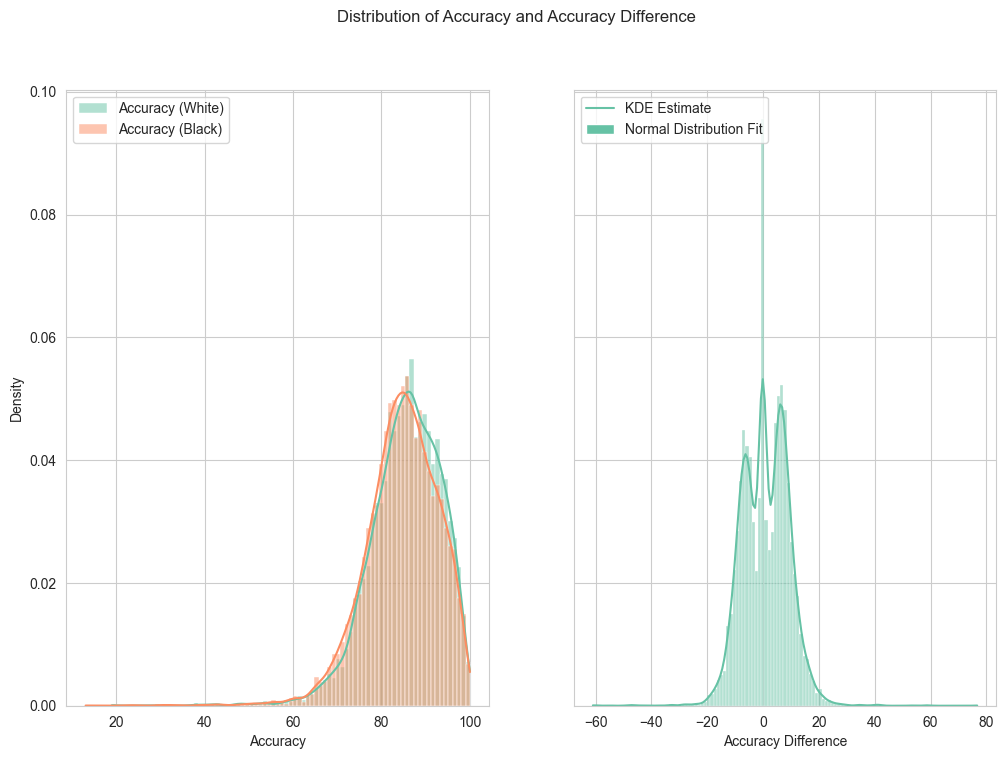

In [108]:
fig, axes = plt.subplots(1, 3 , figsize = (16,8) , sharey=True)
fig.suptitle('Distribution of Accuracy and Accuracy Difference')

#create chart in each subplot
sns.histplot(data  = games ,  x = 'Accuracy (White)' , kde=True , stat = 'density' ,  ax = axes[0]  , label = 'Accuracy (White)')
sns.histplot(data  = games ,  x = 'Accuracy (Black)' , kde=True , stat = 'density' , ax = axes[0] , label = 'Accuracy (Black)')
sns.histplot(data  = games ,  x = 'Accuracy Difference' , kde=True , stat = 'density' , ax = axes[1] , )

#annotations and aesthetics
axes[0].set_xlabel("Accuracy")
axes[0].legend( loc="upper left" )
axes[1].legend(labels = ['KDE Estimate' , 'Normal Distribution Fit'] , loc="upper left" )

games[['Accuracy (White)' , 'Accuracy (Black)' , 'Accuracy Difference']].describe()


,count,mean,std,min,25%,50%,75%,max
Result,,,,,,,,
Black Win,3857.0,-6.907804,5.132332,-61.0,-9.3,-6.7,-4.3,23.9
Draw,1452.0,-0.013430,1.973545,-11.0,-0.5,-0.1,0.3,27.2
White Win,4697.0,7.503066,5.339092,-33.4,4.7,7.0,9.9,76.7


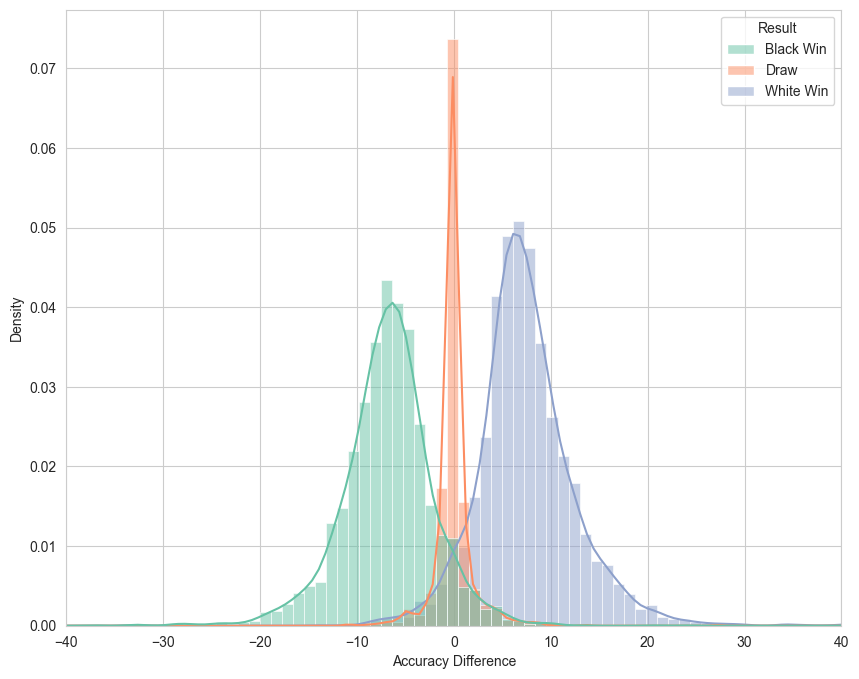

In [287]:
#Histogram of Accuracy Difference
plt.figure(figsize=(10,8))
sns.histplot(data  = games ,  x = 'Accuracy Difference' , kde=True , stat = 'density'  , hue = 'Result')
plt.xlim(-40, 40)

#Generate descriptive statistics grouped by Result
df = games.groupby(by = 'Result')
df['Accuracy Difference' ].describe()

# Rating and Accuracy 

In this section, we delve into the relationship between Rating Difference and Accuracy Difference and how this impacts game results.

Recall from Correlation Analysis analysis section that Rating Difference and Accuracy Difference were moderately positively correlated with a value of $\rho = .44$. This indicates that the player with higher rating tends to achieve a higher accuracy score and the greater the difference between the players rating, the greater the difference in accuracy tends to be. The correlation is of moderate strength, indicating that for a given Rating difference or Accuracy difference, there can be much variability in the other variable.

This is evident from the joint distribution. The KDE plot shows the joint distribution has a positive tilt, relating to the positive correlation between the two variables. However, the distribution is also wide and , for a given point Rating  Difference or Accuracy difference, there are many values that the other variable can take. 

Building upon what we have already discovered of Rating Difference, Accuracy Difference, and their impact on Results, understanding the joint distribution follows naturally. The 3 peaks in Accuracy Difference are clearly present in the joint distribution. As before,  the joint effect of rating difference and accuracy difference becomes more apparent. 

White Win and Black Win results have very similar but opposite joint distributions. 

White Win is centred in the first quadrant ( White Accuracy > Black Accuracy , White Rating > Black Rating ) with large tails extending though this quadrant. Similarly, the Black Win distribution is centred in the third quadrant ( White Accuracy > Black Accuracy , White Rating > Black Rating ). It is, therfore, most common that the player with the higher rating, will achieve the higher accuracy score, and win the game.

In both cases, the distributions are very narrow in the Accuracy Difference axis, with much variability in the Rating Difference Axis. In particular, I note that very little density is on the opposite side of the Accuracy Difference axis. I interpret this to demonstrate that, while a greater Player Rating is correlated with greater accuracy score, accuracy difference is a much stronger predictor of game result than rating difference.

This is especially true when predicting draw games. The distribution of draws is centred at the origin, is extremely narrow along axis of Accuracy Difference, and very long along the axis of Rating Difference Axis. Showing again that accuracy difference is a much stronger predictor of results than Accuracy difference.

Rating difference still has an association with Results, as discussed in previous sections. However, in model building, we may find that in a model that includes accuracy scores, the rating scores may provide no added information to the model. ie. All the variation in Game Result that is explained by Ratings, is also explained by Accuracy Score.

Text(0.5, 1.0, 'Joint Density Function | Result = Draw Win')

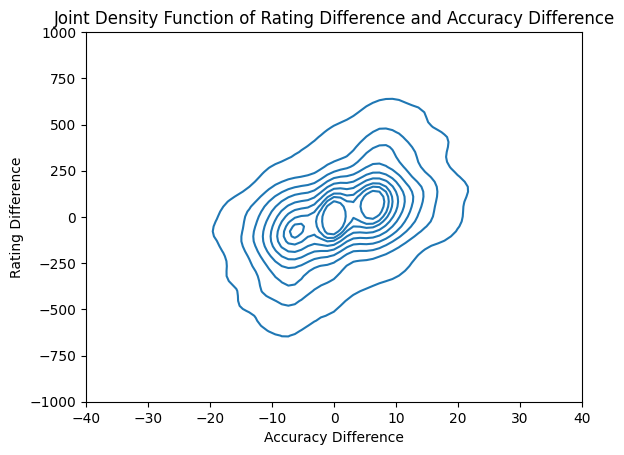

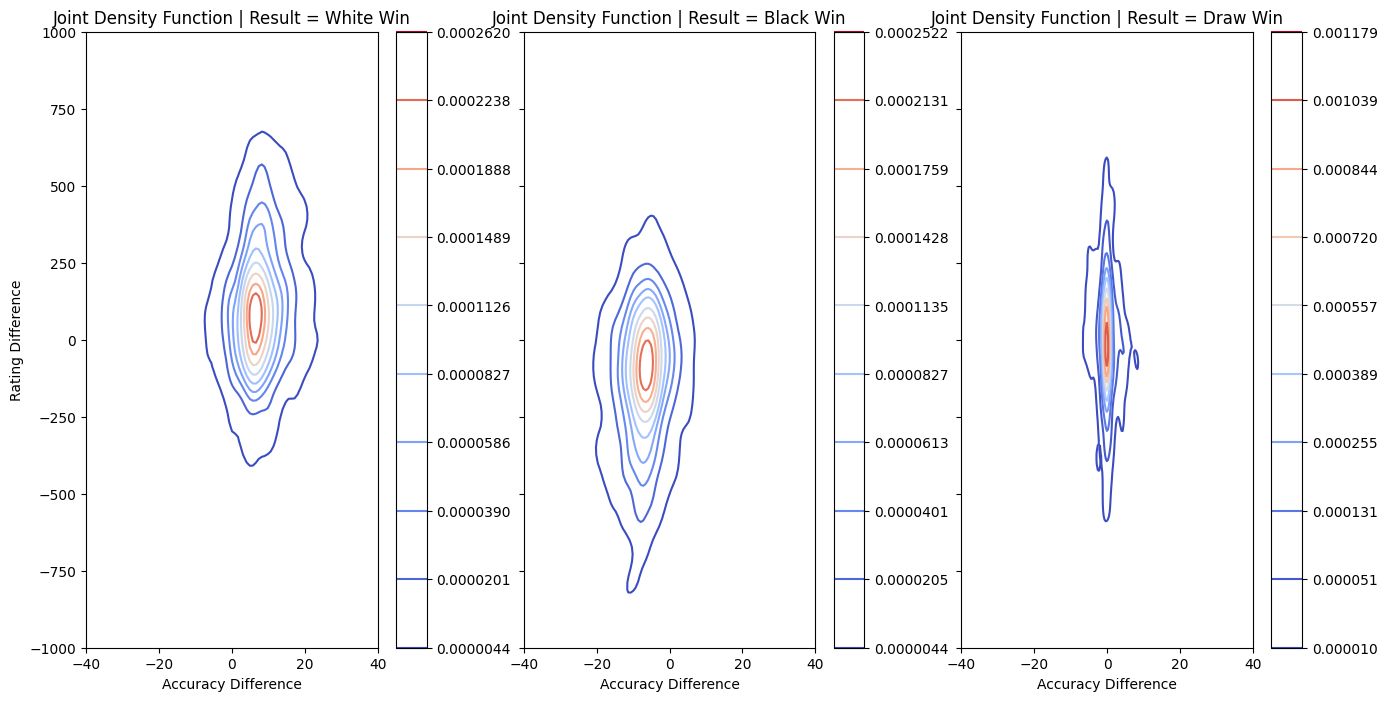

In [19]:
#KDE plot of Rating and Accuracy 
sns.kdeplot(y = 'Rating Difference' , x = 'Accuracy Difference', data = games  , cut = 20 , cbar = False )
plt.xlim(-40, 40);
plt.ylim(-1000, 1000);
plt.title("Joint Density Function of Rating Difference and Accuracy Difference")

fig, axes = plt.subplots(1, 3 , figsize = (16,8) , sharey=True);

#KDE plot of Rating and Accuracy 
sns.kdeplot(y = 'Rating Difference' , x = 'Accuracy Difference' , data = games[games['Result'] =='White Win'] , cut = 20 , ax=axes[0] , cmap = 'coolwarm' , cbar=True)
axes[0].set_xlim(-40, 40)
axes[0].set_ylim(-1000, 1000)
axes[0].set_title("Joint Density Function | Result = White Win")

#KDE plot of Rating and Accuracy 
sns.kdeplot(y = 'Rating Difference' , x = 'Accuracy Difference', data = games[games['Result'] =='Black Win'] , cut = 20 , ax=axes[1] , cmap = 'coolwarm' , cbar=True )
axes[1].set_xlim(-40, 40)
axes[1].set_title("Joint Density Function | Result = Black Win")

#KDE plot of Rating and Accuracy 
sns.kdeplot(y = 'Rating Difference' , x = 'Accuracy Difference' , data = games[games['Result'] =='Draw'] , cut = 20 , ax=axes[2] , cmap = 'coolwarm' , cbar=True)
axes[2].set_xlim(-40, 40);
axes[2].set_title("Joint Density Function | Result = Draw Win")


## Study the Masters

Player titles exhibit a clear association with their FIDE Ratings. It's important to note that FIDE ratings, which are distinct from the ratings used in this analysis (based on games played on Chess.com), are regulated by the FIDE International Chess Federation and rely on performance in FIDE-sanctioned tournaments.

In contrast, titles can only be conferred by FIDE and its affiliated organizations. To attain each title, players must meet a specific minimum rating requirement. Notably, these minimum ratings for National Master, FIDE Master, International Master, and Grand Master increment by 100 from 2200 to 2500, respectively.

However, the minimum rating is just the initial criterion. While we anticipate some level of correlation between a player's rating and their title, titles offer additional insights beyond ratings alone.

Interestingly, the mean and mode ratings for each title tend to rise by approximately 100 rating points as the titles progress. Notably, FIDE ratings are typically lower, making this trend particularly intriguing.

Rating                                                            \
         count         mean         std     min      25%     50%     75%   
Title                                                                      
NM      1755.0  2668.811396  261.270175  1278.0  2510.00  2702.0  2867.0   
FM      3621.0  2752.709473  201.049280  1926.0  2620.00  2783.0  2918.0   
IM      3352.0  2832.656026  178.812351  1876.0  2713.75  2868.0  2974.0   
GM     22684.0  2950.403368  167.201430  2189.0  2869.00  2981.0  3063.0   

               
          max  
Title          
NM     3151.0  
FM     3096.0  
IM     3152.0  
GM     3364.0

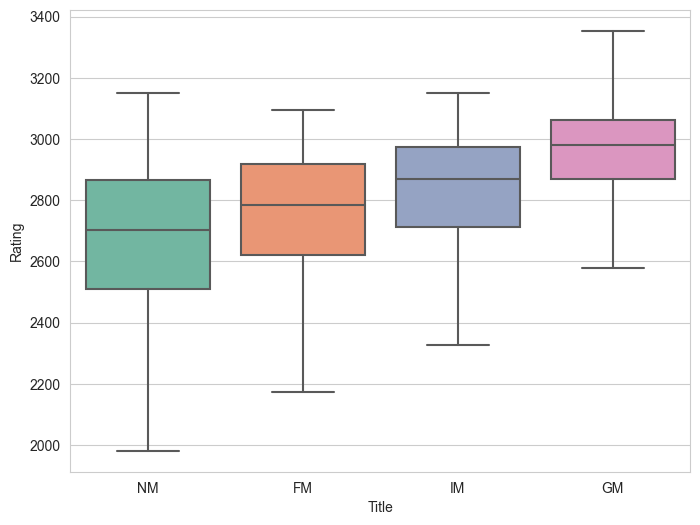

In [104]:
#Create DataFrame of all Players Titles and Ratings 
df = pd.concat( (games[['Rating (White)' , 'Title (White)']].rename(columns={'Rating (White)':'Rating' ,'Title (White)':'Title' }) , games[['Rating (Black)' , 'Title (Black)']].rename(columns={'Rating (Black)':'Rating' ,'Title (Black)':'Title' })) , ignore_index=True , names=['Rating' , 'Title'])

#Box Plot
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Title' , y = 'Rating' , data = df , showfliers = False)

#Descriptive statistics grouped by Title
df.groupby(by = 'Title' , sort = True).describe()

## Use your Time wisely

Draws in chess games tend to occur at both very low and very high move counts. Particularly as games progress to higher move counts, a much higher proportion of games end in Draws.

Draws can happen in a few ways. Players can offer and agree upon a draw at any point during the game. In tournament games, a "quick draw" is a common occurrencewhere a draw will see both players progress in the tournameon. This often results in a limited number of moves before agreeing to a draw, contributing to the higher number of draws at low move counts.

Games may continue to higher move counts when neither player secures a winning advantage. After 50 moves, the "Fifty-Move Rule" comes into effect, declaring the game a draw if 50 consecutive moves occur without a pawn move or capture. This rule compels captures and exchanges to avoid a draw.

As positions simplify due to captures and exchanges, one player can gain an advantage and win the game. Alternatively, as the game extends, the likelihood of threefold repetition (the same position occurring three times with the same player to move and the same possible moves) and theoretical draws (positions where it's known that the game cannot be resolved other than in a draw, e.g., two kings and no other pieces on the board) increaAs suchherefore, games with higher move counts are more likely to end in draws, and the longer a game persists, the greater the likelihood of a draw outcome.

,count,mean,std,min,25%,50%,75%,max
Draw,,,,,,,,
False,13625.0,43.517064,17.556273,4.0,31.0,41.0,54.0,167.0
True,2081.0,55.963960,23.642472,4.0,40.0,55.0,69.0,204.0


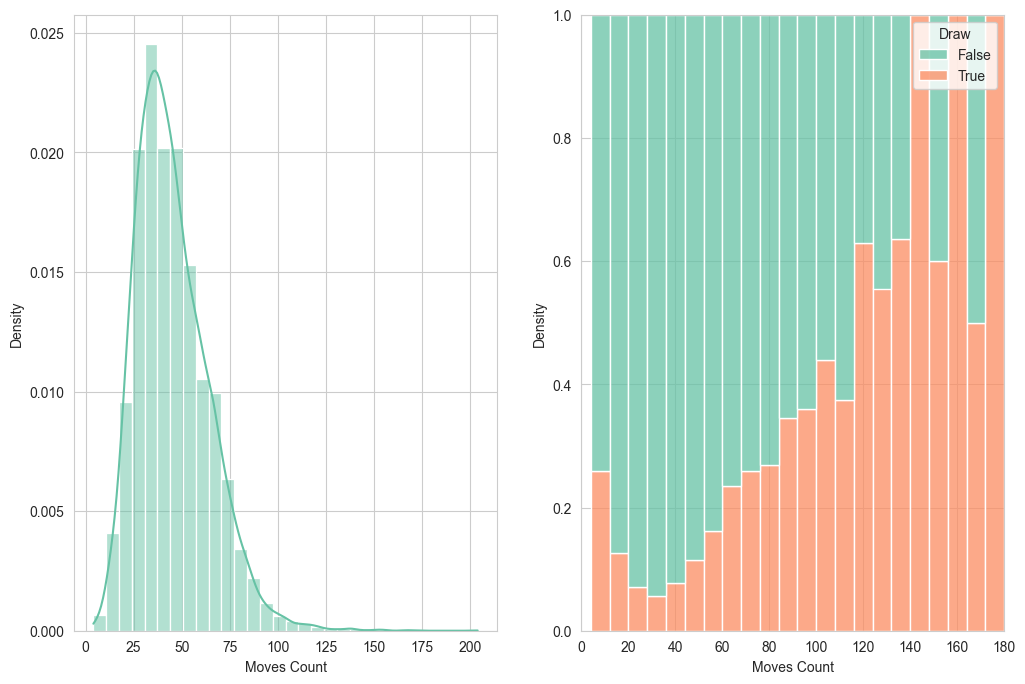

In [125]:
#Create new boolean variable 'Draw'
games['Draw'] = (games['Result'] == 'Draw')

#Subplots
fig, axes = plt.subplots(1, 2 , figsize = (12,8) , sharey=False)
sns.histplot(x = 'Moves Count' ,data  = games , stat = 'density' , kde = True , ax = axes[0] , bins = 30)
sns.histplot(x = 'Moves Count' ,data  = games , stat = 'density' , hue = 'Draw' , multiple = 'fill' , bins = 25, ax = axes[1]) 

#annotations and aesthetics
axes[1].set_xlim(0 , 180)

#Generate descriptive statistics
df = games.groupby(by = 'Draw')
df['Moves Count'].describe()

The probability of a draw in chess is influenced Time. As the time allocated to players increases, a higher proportion of games tend to result in draws. This phenomenon is likely attributed to players having more time to carefully consider their moves, reducing the likelihood of making mistakes that their opponents could exploit. Additionally, with more time available to each player, the risk of losing due to a time forfeit decreases significantly.

The relationship between time and move counts also plays a role in determining the likelihood of a draw. As evident from the boxplot below, the distributions of draw games and non-draw games exhibit substantial differences in terms of move counts when time is limited. This supports the notion that higher move counts are associated with an increased likelihood of a draw. However, as the time allocated to players increases, the disparities between various quantiles lessen, indicating the effect of Move Counts on Draw probabilities is inversely proportional to Time.

When progressing to Model Building, this relationship may prove very useful in capturing the variabilty of draw games.  For example, an interaction term between Moves Count and Time may improve model overall fit.

<Figure size 1200x800 with 0 Axes>

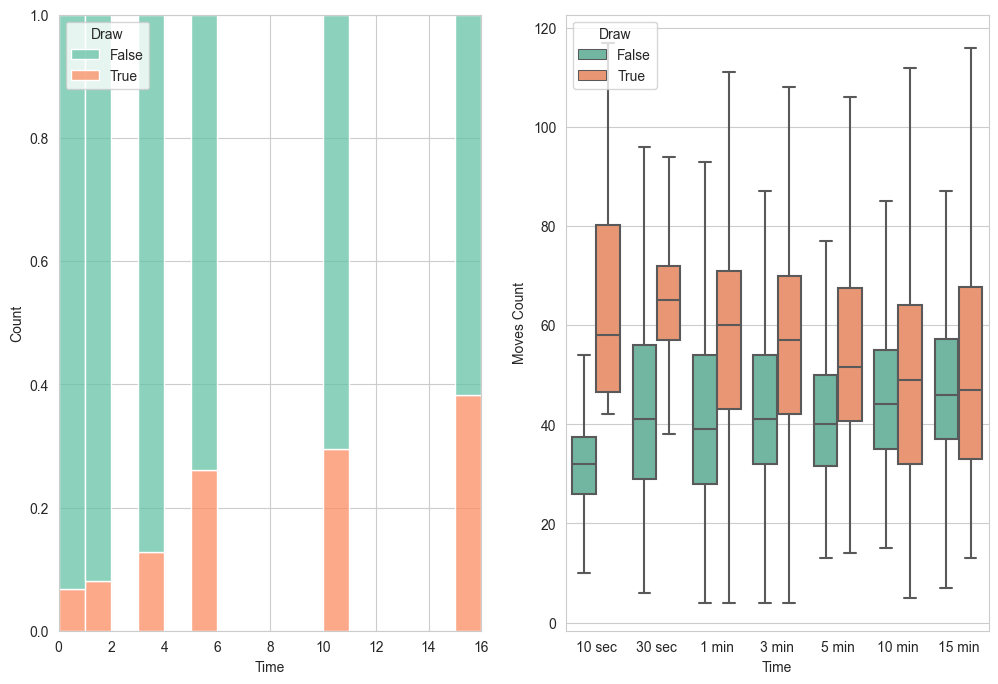

In [193]:
#Violin Plot of moves Count vs Game Type for each Game Type
fig, axes = plt.subplots(1, 2 , figsize = (12,8) , sharey=False);

plt.figure( figsize=(12,8) );
df = games.copy()
df['Time'] = pd.Categorical( values = games['Time'], categories=[0.166667, 0.500000, 1.000000, 3.000000, 5.000000, 10.000000 ,15.000000] , ordered = True)
sns.histplot(data = df , x = 'Time' , hue = 'Draw' , multiple = 'fill' , ax=axes[0]);

sns.boxplot(x = 'Time' ,y = 'Moves Count' , hue = 'Draw' , data = games , showfliers  = False  , ax = axes[1]);

plt.sca(axes[1]);
plt.xticks(range(7),  ['10 sec' , '30 sec' , '1 min' , '3 min' , '5 min' , '10 min' , '15 min']);


## Tournament Games

Whether or not a game is part of a Tournament has little impact on Game outcome.

The Distribution of Results for Tournament and Non-Tournament Games is almost identical. We can test this hypothesis with a Chi-Square test under the following null and alternative hypothesis:

**Null Hypothesis ($H_0$):** There is no significant association between the two categorical variables. In other words, the variables are independent of each other.

**Alternative Hypothesis ($H_1$):** There is a significant association between the two categorical variables. They are not independent, and a relationship or association exists.

Executing the Chi-Square test returns a p-value of 0.213. We fail to reject the null hypothesis.

Chi-Square Statistic: 3.0888287908268013
P-value: 0.21343682421603158


<Axes: xlabel='Tournament Game', ylabel='Percent'>

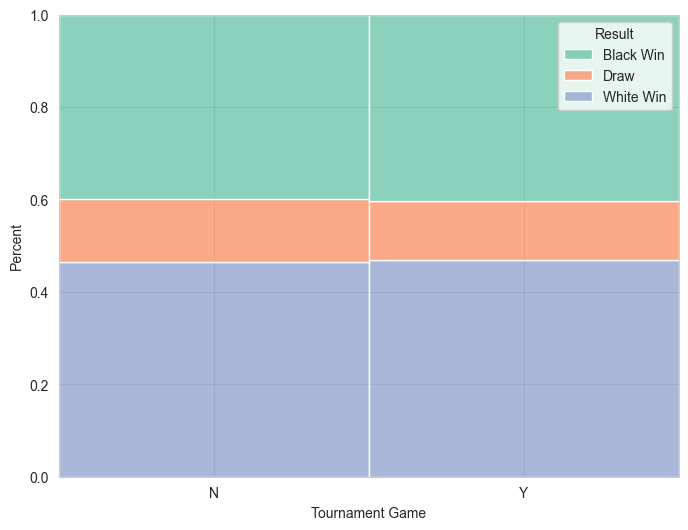

In [255]:
from scipy.stats import chi2_contingency
# Create a contingency table from the dataset
contingency_table = pd.crosstab(games['Result'], games['Tournament Game'])
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Output the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)

#Visualise difference between Tournament and Non-Tournament Games
plt.figure(figsize = (8,6))
sns.histplot(data = games , hue = 'Result' , x = 'Tournament Game'  , multiple='fill'  , stat = 'percent')

# Conclusions

Through research and analysis, we made insights that strengthened our understanding of the game of chess. To summarise our findings, lets revisit the questions posed at the beginning of this analysis.

**Which side tends to win more frequently: white or black?** 
The definitive answer is White. White carries a higher win rate, slightly higher distribution of accuracy scores, concluding that at the highest level of chess, the theoretical advantage of playing white is converted to wins.

**How does player skill level affect game outcomes?**
Rating is an important indicator of results. The higher rated player is more likely to win and , the greater the gap, the more likely a game ends in a win for them. However, there is no guarantee and there are many upsets as we have seen.

**How does player accuracy affect game outcomes?** 
Accuracy has shown to be the single most important indicator of game results. Even if there is a large disparity between the players rating, it is ultimately how the players fare within that game that decides the outcome.  


**What can we learn from the time format of the games?**
Time controls do have an impact on how the game is played and the result. Games with longer time controls are more susceptible to ending in draws, and tend to have higher accuracy scores. 

Moves count also contributes to the likelihood of draws and its effect is connected with Time contols. Higher move counts result in a higher chance of draws, with the extent of which this happens lessening as more time is available to players.

**Limitations and Further Research**:

- For every game, the moves played are recorded in algebraic notation. In this analysis, we have found that accuracy is a key proponent of game results, yet we have not analysed game moves. This could be a source of further research.
- This analysis focuses on Titled players and is not reflective of the population of chess players. 
